# China's Corporate Debt: Analyzed and Illustrated

### By: Dillon Fournier, Hoyoung Jun, Yingqiang Wang



## **Background**:

China is currently the second largest economy in the world, and could very easily surpass the United States as the largest within the next twenty years. China's economic growth has been described as "miraculous" and "recession-proof", as China had been able to maintain around double-digit economic growth prior to the global financial crisis, and ~7% afterwards. In 2015, China accounted for over half of the world's total economic growth.That China was able to not only survive the financial crisis, but veritably thrive, is remarkable, and begs the question of what made China's approach different. How China arrived at its current position has major implications for the economic and financial policies of all emerging markets. Where China goes from here, however, has serious implications for the entire global economy. This project posits that a significant contributing factor to China's economic growth has been the rapid rise in Chinese private non-financial sector debt--particularly corporate debt. We analyze data from two sources: the China Central Depository and Clearing Corporation, and the Bank of International Settlements, in an effort to illustrate the evolution and extent of China's corporate debt issue.

### Some Key Terms:

#### Credit to Non-Financial Corporations

This is the key point of our paper--the credit to private, non-financial (meaning not banks) corporations. When we talk about corporate debt in this paper, this is what we will be referring to. A ballooning level of credit to non-financial corporations has often preceded crisis, as it did in both Japan, and the countries impacted by the Asian Financial crisis. Disproportionately rapid growth in Credit to non-financial corporations has also been potentially shown to have [links to risks of currency and financial crises](https://www.hks.harvard.edu/sites/default/files/centers/mrcbg/files/Pongmanavuth_final.pdf).
#### Credit to the Private Non-Financial Sector

This is a term we'll bring up a lot, and its important to distinguish it from corporate debt. Credit to the private non-financial sector includes corporate debt, but it also includes credit to households and non-corporate, private entities. Countries with high credit to corporations typically have high rates of credit to the private non-financial sector. Where credit to the private non-financial sector is less indicative of what we are trying to achieve is in discerning the potential imbalances of credit allocation within a country.  Often, [macroeconomic imbalances are intertwined with credit imbalance](http://www.europarl.europa.eu/document/activities/cont/201204/20120419ATT43526/20120419ATT43526EN.pdf), and the rebalancing period can be painful.

## Packages, Libraries, and Plotly

Below is a list of the packages and libraries we used for this project
### For Reading in Data
* `lxml`
  * `etree`
* `xlrd`

### For Analyzing Data
* `pandas`
* `numpy`
* `datetime` 
* `math`
  * `pi`
  
### For Graphing Data
* `geopandas` (for maps)
  * `fiona`
* `shapely.geometry` (for maps)
  * `Point`
  * `Polygon`
* `seaborn` (for graphic designs)
* `matplotlib.pyplot`
* `plotly` (for interactive graphs)
  * `plotly.plotly`
  * `plotly.graph_objs`
 * `warnings.filterwarnings('ignore')` (to avoid unnecessary warnings)  
   

In [90]:
!pip install lxml #needed to help read in HTML and EXCEL files from online
!pip install xlrd
!pip install geopandas
#!pip install plotly
import seaborn as sns     #Graphics tool we need for heatmap
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import lxml
import datetime as dt 
import xlrd
from lxml import etree
from datetime import datetime
from math import pi
import fiona # Needed for geopandas to run
import geopandas as gpd # this is the main geopandas 
import plotly.plotly as py          #needed for the interactive graph
import plotly.graph_objs as go      #also needed for the interactive graph

import numpy as np
from shapely.geometry import Point, Polygon # also needed
import warnings
warnings.filterwarnings('ignore')

#import pandas, matplotlib, and libraries to read html files


## The Chinese Bond Market

### From the [China Central Depository and Clearing Corporation](http://www.chinabond.com.cn/d2s/engindex.html)

The China Central Depository and Clearing Corporation publishes monthly data regarding the changes in the outstanding values of the Chinese bond markets. Unfortunately, this data isn't aggregated on anything more than a monthly basis, and aren't fully standardized (some are HTML files, some are excel files). This makes it difficult to read them all in and combine them. Luckily, we only needed one column from each of the datasets (the second column, which tracked outstanding values of each type of bond in 100's of millions of RMB), and we were able to merge each month successfully and track them by their month and year. 

### The Chinese Bond Market: Reading in the Data
Below we go through the process of reading in each month's data, formatting the column and row names, merging the data and then transposing it, and lastly setting the index as a datetime to make timeseries analysis much easier. The reason we have to go through this process is that the HTML/Excel files each only contain information about bond markets for a particular month, and they are indexed by the type of bond. By reading it in, merging it on the index of bond types, then transposing it and setting the index to the date, we are able to create a datetime-indexed dataframe out of ~200 individual, non-time-indexed files.

In [0]:


l = []                     #create an empty list for URLs

exc_data = pd.DataFrame()  #create an empty dataframe for excel files
html_data = pd.DataFrame() #create and empty dataframe for html files

#In this loop we bring in data files from the website chinabond.com. Each data file is on a separate page (different URL adress) so 
#we create a loop to bring in data for each month since 2001 to 2017.

for a in range(2001,2018):    #range of years 
  for b in range(1,13):       #range of months
    if b <= 9:                #if the month is a singular digit
      url = 'http://www.chinabond.com.cn/DownLoadxlsx?sId=0300&sBbly=' + str(a) +'0'+ str(b) + '&sMimeType=1&sc=EN'
      l.append(url) 
    else:                     #if the month is two digits
      url = 'http://www.chinabond.com.cn/DownLoadxlsx?sId=0300&sBbly=' + str(a) + str(b) + '&sMimeType=1&sc=EN'
      l.append(url)
      
counter = 0                   #create a counter to keep track the number of months
for i in l:                   #for each item in the list of urls
  counter += 1
  try:                        #try reading the data as a html file. If there is an exceprion, got to the excpet statement
    data = pd.read_html(i, skiprows=1) 
    data = data[1].iloc[:, :2].set_index(0)

    if counter / 12 > 9:                                #For years after 2009
      if counter%12 == 0:                                          #For December
        D = '20' + str(counter//12) + '/' + str(12)
      else:
        D = '20' + str(counter//12+1) + '/' + str(counter%12)
    else:                                        #For years between 2001 to 2009
      if counter%12 == 0:
        D = '200' + str(counter//12) + '/' + str(12)
      else:
        D = '200' + str(counter//12+1) + '/' + str(counter%12)
    new_header = [D]
    data = data[1:]
    data.columns = new_header                               #change column names
    html_data = pd.concat([html_data, data],axis=1)
  except:                                       # if the file is not a html file, read it as an excel file.
    data = pd.read_excel(i, skiprows=1).iloc[:, :2]
    if counter / 12 > 9:
      if counter%12 == 0:
        D = '20' + str(counter//12) + '/' + str(12)
      else:
        D = '20' + str(counter//12+1) + '/' + str(counter%12)
    else:
      if counter%12 == 0:
        D = '200' + str(counter//12) + '/' + str(12)
      else:
        D = '200' + str(counter//12+1) + '/' + str(counter%12)
    new_header = [0,D]
    data = data[1:]
    data.columns = new_header                            #change column names to match
    data = data.set_index(0)                             #set bond/debt category as index
    exc_data = pd.concat([exc_data, data],axis=1)


In [0]:
exc_data = exc_data.iloc[:,:-4]
data1 = pd.concat([html_data, exc_data], axis = 1).dropna()
bonddata =data1.T

##### Prepping for Time Series and More Graphing
Now we've almost got our full bond dataset. We need to make sure the index and the data is optimized for time series graphing, 

In [12]:
bonddata.index = pd.to_datetime(bonddata.index,format = "%y%m", infer_datetime_format= True) #converting the bond dataset's index to datetime
bonddata.dtypes  #Checking the dtypes of the bonddata entries

Agricultural Development Bank of China                object
Asset-backed Securities/Mortgage-backed Securities    object
Central Bank Bonds                                    object
China Development Bank                                object
Commerial Bank Bonds                                  object
Corporate Bonds                                       object
Export-Import Bank of China                           object
Government Bonds                                      object
Local Corporate Bonds                                 object
Others                                                object
Policy Bank Bonds                                     object
State-owned Corporate Bonds                           object
Treasury Bonds                                        object
dtype: object

We're nearly done formatting the bonddata, but we noticed something crucial: the data is in the `object` dtype. Now before we do any graphing of the bond data, we have to make sure that the data is in a graphable type. It's currently an `object` dtype, so we'll have to convert it to a `float`. in the next step, we also add a set of columns detailing the multiples of each of the five bond categories listed in `varlist`, for later plotting. 

In [92]:
bonddata = bonddata.astype(float) #converting bonddata entries into floats for graphing

varlist = ["Corporate Bonds", "Government Bonds","Policy Bank Bonds", "State-owned Corporate Bonds", "Treasury Bonds"]
for var in varlist:
    new_name = var + " Growth"
    bonddata[new_name] = bonddata[var]/ bonddata[var].loc["2001-01-01"]
display(bonddata.tail(5))


,Agricultural Development Bank of China,Asset-backed Securities/Mortgage-backed Securities,Central Bank Bonds,China Development Bank,Commerial Bank Bonds,Corporate Bonds,Export-Import Bank of China,Government Bonds,Local Corporate Bonds,Others,...,Corporate Bonds Total Increase,Government Bonds Total Increase,Policy Bank Bonds Total Increase,State-owned Corporate Bonds Total Increase,Treasury Bonds Total Increase,Corporate Bonds Growth,Government Bonds Growth,Policy Bank Bonds Growth,State-owned Corporate Bonds Growth,Treasury Bonds Growth
2017-04-01,32548.6,5485.502777,0.0,71993.72,16471.65,35403.217762,22015.9,230629.165870,29375.474582,59.72,...,122.682645,25.176045,17.262375,18.695770,11.955521,122.682645,25.176045,17.262375,18.695770,11.955521
2017-05-01,32996.7,6046.269982,0.0,71590.62,16709.65,35292.205712,22115.9,236950.015097,29310.762533,59.72,...,122.297955,25.866045,17.282153,18.480922,12.057271,122.297955,25.866045,17.282153,18.480922,12.057271
2017-06-01,33548.0,6168.667062,0.0,71834.32,16602.65,35166.889272,22165.9,243521.332592,29316.346092,59.72,...,121.863696,26.583386,17.397410,17.985385,12.258032,121.863696,26.583386,17.397410,17.985385,12.258032
2017-07-01,33207.6,5702.526809,0.0,72039.22,17049.15,35537.759272,22175.9,252993.759102,29677.296093,59.72,...,123.148871,27.617419,17.380292,17.916079,12.468104,123.148871,27.617419,17.380292,17.916079,12.468104
2017-08-01,33872.0,6294.784788,0.0,72627.22,17225.15,36193.013274,22565.4,257413.502246,30332.444332,59.72,...,125.419520,28.099889,17.604245,17.822536,12.542018,125.419520,28.099889,17.604245,17.822536,12.542018


### The Chinese Bond Market: Plotting the Data

##### Spider Graphs
Now that we've got the time series graph above, lets compare the growth in the Chinese corporate bonds with that in four other key bond markets: Treasury Bonds, Government bonds (closely tied to treasury bonds), state-owned corporate bonds, and policy bank bonds (bonds issued by any of the China Development Bank, China Agricultural Bank, and the China Export/Import Bank). For this, we're going to examine  4 different time periods to see how the outstanding values in each bond market change over time.

In [114]:
d = ['2001-01-01', '2006-01-01', '2011-01-01', '2017-01-01']     # a list of the 4 dates we want to chart
t = ['Corporate Bonds', 'Government Bonds', 'Treasury Bonds', 'State-owned Corporate Bonds', 'Policy Bank Bonds']   #The types of bond data that we want to chart
def achieve_d(data,date,time):         #creating a function to facilitate making the dataframe we'll use
  rslt = pd.DataFrame()                #Result will be a dataframe
  for item in time:                    #Start of the for-loop
    i = item[:-5]
    l = []
    for d in date:
      l.append(data[item].loc[d])                    #adds the dates to the dataframe
    rslt = pd.concat([pd.DataFrame({i: l}), rslt], axis = 1)       #concatenates
  return rslt                                                     #returns the results

pendata = pd.concat([pd.DataFrame({'Time': d}),achieve_d(bonddata, d, t)], axis = 1)    #Creates the pentagon diagram dataframe "pendata"
display(pendata)                   #taking a look at pendata

,Time,Policy Bank,State-owned Corporate,Treasury,Government,Corporate
0,2001-01-01,7331.44890,288.57560,9160.658940,9160.658940,288.575600
1,2006-01-01,17998.25001,1791.50000,26702.568850,27073.743770,1896.500000
2,2011-01-01,52657.34286,8795.93980,59409.745875,66407.531919,14813.999800
3,2017-01-01,124109.42000,5440.44908,108653.145875,221713.428487,35362.485178


**This dataset gives us a strong look at the outstanding value of the five bond markets every ~5 years form 2001 until 2017. There are a few interesting takeaways here:**

**1. Change in the prominence of state-owned corporate bonds**

Back in 2001, all outstanding corporate bonds were issued by state-owned corporations. 2006 was a similar story. This trend changed by 2011, where less than 60% of outstanding corporate bonds were issued by state-owned enterprises. By January, 2017 state-owned corporate bonds were around 1/7th of the total market for corporate bonds, meaning that the increase in corporate debt in China has been driven largely by private sector companies.

**2. Separation of Treasury Bonds from Government Bonds**

In 2001, the total amount of government bonds outstanding was simply the amount of treasury bonds. The Chinese government, then, did not tap bond markets outside of their treasury bond market. By 2017, however, Treasury bonds comprised less than half of the total government bonds issued by value. Were it not for our observation about state owned corporations actually taking a lesser role as time has gone on, they could be one idea regarding what makes up the remaining government bonds.

##### Plotting the Spider Graphs
We create 4 "spider" graphs that illustrate the change in the value of the five bond markets we've selected, and plot them. The five bond markets we have selected are Government Bonds, Policy Bank Bonds, Coporate Bonds, State-owned Corporate Bonds, and Treasury Bonds.

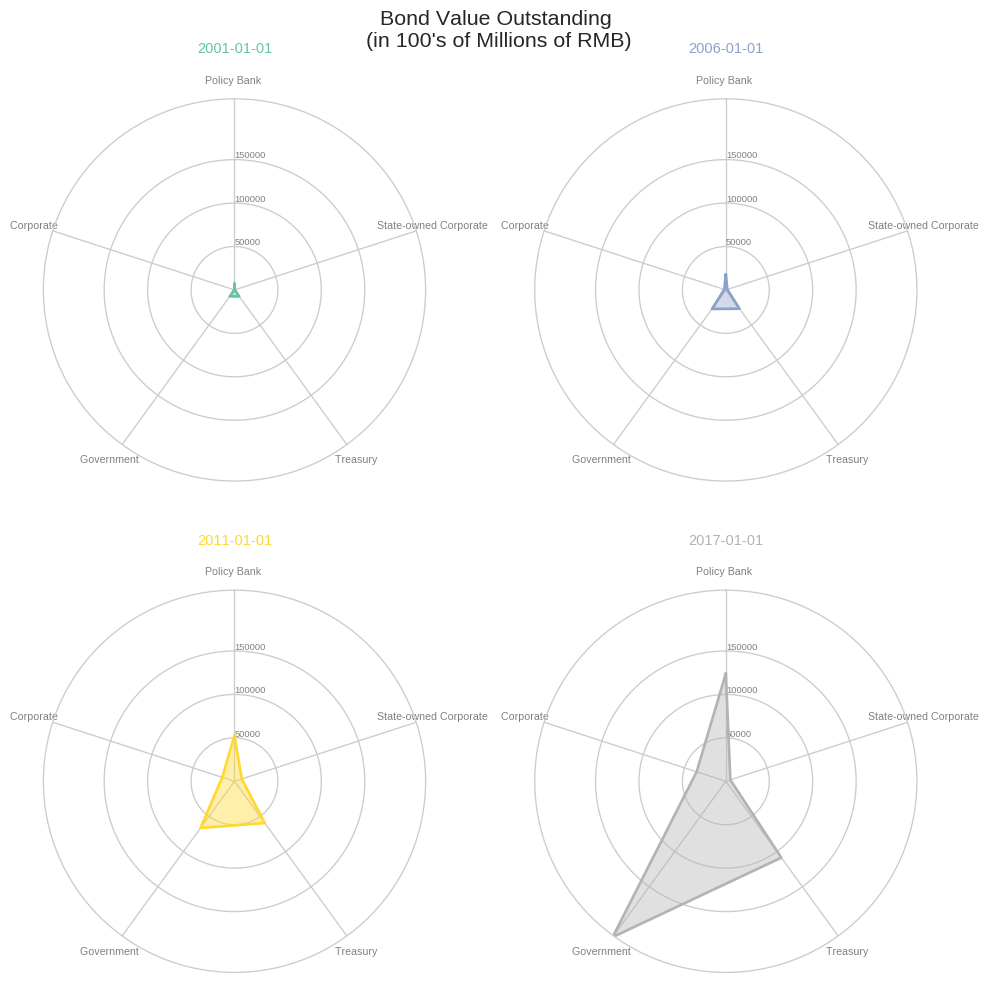

In [90]:

#create spider graphs to compare the distribution and growth of the following: 
#corporate, government, treasury, state-owned corporate, policy bank
#the more one category stretches out to a vertex the higher its number is.

df = pendata


#function to create a spider graph
def make_spider(row, title, color):
 
  categories=list(df)[1:]
  N = len(categories)
 
 # Angle of each axis plot
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
 
  ax = plt.subplot(2,2,row+1, polar=True, )
 
 # Set axis on top
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
  plt.xticks(angles[:-1], categories, color='grey', size=8)
 
 # Draw labels inside the graph
  ax.set_rlabel_position(0)
  plt.yticks([50000,100000,150000], ["50000","100000","150000"], color="grey", size=7)
  plt.ylim(0,220000)
 
  values=df.loc[row].drop('Time').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
  ax.fill(angles, values, color=color, alpha=0.4)

  plt.title(title, size=11, color=color, y=1.1)
 

 # initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
 # Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
 # Plot with a loop
for row in range(0, len(df.index)):
  make_spider( row=row, title=df['Time'][row], color=my_palette(row))
plt.suptitle("Bond Value Outstanding\n (in 100's of Millions of RMB)", fontsize = 16, y = 1)  

plt.tight_layout()


Through these graphs we can see clearly that four of the five bond markets have grown substantially since 2001 (the exception being `State-owned Corporate bonds`). The increase is in Government seems particularly drastic. Furthermore, these graphs can be aggregated together onto one plane to further illustrate these changes. That aggregation is done below.


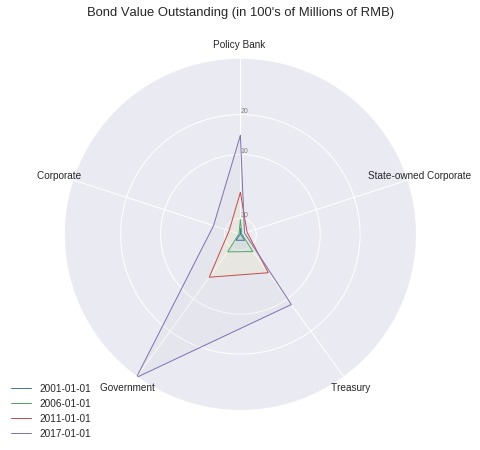

In [116]:
categories=list(df)[1:]
N = len(categories)

#create one spider plot with data for all four years
# repeat a similar process as above

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialize plot
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)
 

ax.set_rlabel_position(0)
plt.yticks([100000,150000,20000], ["10","20","30"], color="grey", size=7)
plt.ylim(0,220000)
 


#plot data for 2001
values=df.loc[0].drop('Time').values.flatten().tolist()   
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2001-01-01")
ax.fill(angles, values, color='#0faf15', alpha=0.1)
#2006
values=df.loc[1].drop('Time').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2006-01-01")
ax.fill(angles, values, color='#4286f4', alpha=0.1)
#2011
values=df.loc[2].drop('Time').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2011-01-01")
ax.fill(angles, values, color='#fffa72', alpha=0.1)
#2017
values=df.loc[3].drop('Time').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="2017-01-01")
ax.fill(angles, values, color='#c1c1c1', alpha=0.1)

plt.suptitle("Bond Value Outstanding (in 100's of Millions of RMB)", fontsize = 13, y = 1.05)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()


##### Spider Plots: Takeaways

These spider plots were informative, and showed the growth of each of the major bond markets in China. These plots seem to indicate, however, that the corporate bond market's growth has not been excessively high. We decided to take a closer look at this aspect.

##### Time Series plot of Chinese Corporate Debt


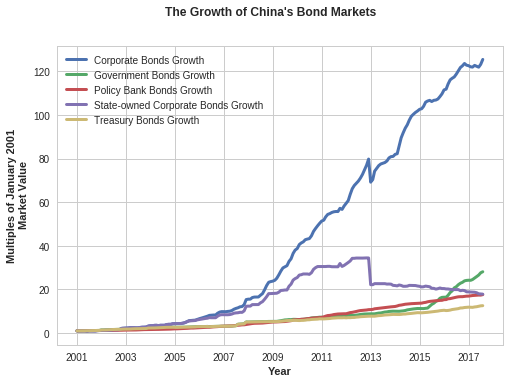

In [71]:
#here we plot how much each category has grown compared to their base year
#the numbers represent how many times larger they are compared to the
#first year

trlist = []
for var in varlist:
  newname = var + " Growth"
  trlist.append(newname)

fig, ax = plt.subplots()
for var in trlist:
  plt.plot(bonddata[var], lw = 3)
plt.suptitle("The Growth of China's Bond Markets ", fontsize = 12, fontweight = "bold")
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
ax.set_ylabel("Multiples of January 2001\n Market Value", fontweight = "bold", fontsize = 11)
ax.set_xlabel("Year",fontweight = "bold", fontsize = 11)
plt.legend()
plt.show()

This graph is particularly revealing. We can take away several noticeable trends.
Firstly, this graph makes it apparent when China's corporate bonds began to no longer be dominated by State-owned enterprises. 2009 was a key point when they began to diverge, and private corporations began to control the Chinese corporate debt markets by 2011 and were the substantial majority of the corporate bond market by 2013. 
Secondly, this graph demonstrates much more clearly than the spider graphs that the sector of Chinese bonds that has experienced the most drastic growth over the past 17 years has most certainly been corporate bonds. While the market for Chinese government bonds has increased nearly 30-fold in the past two decades, the market value of China's corporate bonds have increased  by over 125-fold. This demonstrates that China's corporate debt is on a significant upward trajectory, but it is not enough to sound the alarm bells. We need to contextualize this growth in corporate debt before we can determine whether it should be considered worrisome. 

### **The Chinese Bond Market: In Summary** 
Though informative about the growth of China's corporate debt, this examination of China's Bond Markets hasn't fully given us the understanding of the global significance of this growth. After all, China's economy does not operate in a vacuum. The world's economy changes as well. In This brings us to our second dataset, the one that will form the bulk of our analysis of the extent of China's Corporate debt.

## China's Corporate Debt Vs. The World
### Data from the Bank of International Settlements (BIS)

Now that we've taken a look at China's bond market over the past 17 years, it helps to provide context to truly understand the extent of China's corporate debt issue. For this section, we'll import a large dataset from the Bank of International Settlements that contains quarterly key debt indicators from a wide swath of countries dating back to 1950. The objective of using this data set will be to look specifically at certain debt to GDP ratios around the globe and over time to determine how China's current corporate debt stacks up against the rest of the world both currently and historically. We'll begin by reading in the data and formating it properly, before going on to plot some time series graphs of corporate debt ratios around the globe.

#### Reading in and Formatting the Data

We'll begin by reading in the data from this URL: http://www.bis.org/statistics/totcredit/totcredit.xlsx 

We'll format the data by weeding out the initial 90+ entries (almost entirely NAs) and setting the index to be the date of the information.


In [93]:
#grab the BIS data from the website
urlbis = "http://www.bis.org/statistics/totcredit/totcredit.xlsx"
bisdata = pd.read_excel(urlbis, sheet_name = "Quarterly Series").iloc[90:]
bisdata.rename(columns = {"Back to menu":"date"}, inplace = True)
bisdata.set_index("date", inplace =True)
display(bisdata.tail(5))

,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to General government from All sectors at Nominal value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Households and NPISHs from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,...,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,South Africa - Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - USD - US Dollar - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Private non-financial sector from All sectors at Market value - Domestic currency - Unadjusted,"South Africa - Credit to Private non-financial sector from Banks, total at Market value - Percentage of GDP - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - USD - US Dollar - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - Domestic currency - Adjusted for breaks","South Africa - Credit to Private non-financial sector from Banks, total at Market value - Domestic currency - Unadjusted"
date,,,,,,,,,,,,,,,,,,,,,
2016-09-30,188.1,173.9,46824.6,46.4,45.8,11564.4,36.4,32.4,9067.22,104.9,...,1599.78,1599.78,72.5,220.988,3073.72,3073.72,65.7,200.223,2784.9,2784.9
2016-12-31,183.1,174.9,46134.9,45.6,46.3,11493,35.6,32.9,8983.99,101.6,...,1620.54,1620.54,71.9,226.57,3107.4,3107.4,65.4,206.118,2826.9,2826.9
2017-03-31,187.5,174.2,48372.4,47.2,46.1,12189.4,37,33.1,9548.85,103,...,1693.74,1693.74,72.7,240.189,3199.32,3199.32,65.4,216.203,2879.82,2879.82
2017-06-30,189.4,174.8,49843.4,47.9,46.6,12604.1,37.9,33.7,9967.57,103.4,...,1710.07,1710.07,72.1,246.469,3222.34,3222.34,64.8,221.621,2897.47,2897.47
2017-09-30,191.9,176,51793.9,48.5,47.1,13093.3,38.9,34.4,10494.4,104.3,...,1772.27,1772.27,72.5,244.073,3296.21,3296.21,64.4,216.643,2925.77,2925.77


In [94]:
#grab columns that have the word 'corporations'
bis_corp = bisdata.filter(like = 'corporations')
bis_corp.tail(5)

,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,All reporting countries (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP (using PPP exchange rates) - Adjusted for breaks,Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Argentina - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,...,United States - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,United States - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,Euro area - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,Euro area - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted,South Africa - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - USD - US Dollar - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Adjusted for breaks,South Africa - Credit to Non-financial corporations from All sectors at Market value - Domestic currency - Unadjusted
date,,,,,,,,,,,,,,,,,,,,,
2016-09-30,104.9,95.5,26130,95.7,93.1,64736.8,90.4,90.3,38606.9,12.5,...,13365.8,13365.8,104.6,12505.7,11205.1,11205.1,37.7,115.018,1599.78,1599.78
2016-12-31,101.6,95.5,25608.1,91.9,93,62656.8,86.2,89.9,37048.7,12.4,...,13434.5,13434.5,104.3,11852.2,11244.1,11244.1,37.5,118.158,1620.54,1620.54
2017-03-31,103,94.8,26584.5,93.7,92.9,64637.5,88.1,90.4,38052.9,12.1,...,13700.7,13700.7,104.5,12130.2,11346.6,11346.6,38.5,127.157,1693.74,1693.74
2017-06-30,103.4,94.3,27219.7,95.5,92.4,66575.1,90.7,90.1,39355.4,12.8,...,13878,13878,103.5,12931.7,11332,11332,38.3,130.8,1710.07,1710.07
2017-09-30,104.3,94.4,28153.5,96.5,92.3,68411.9,91.7,89.8,40258.4,14.2,...,14041.9,14041.9,102.2,13344.3,11302.7,11302.7,39,131.23,1772.27,1772.27


### Comparing China's Corporate Debt to Emerging and Advanced Economies

Here, we aim to get a sense of how China's debt "behaves": that is to say, does China's debt levels more closely mirror that of a traditional emerging market, or a developed country. While we know China is an emerging market, we also know that its corporate debt is high. 
It would make sense somewhat intuitively that developed economies would have higher corporate debt to GDP ratios: companies from more established, developed nations may be seen as more trustworthy and thus be able to take on higher debt loads comfortably.  Though China is an emerging market, it is also one of the most important economies in the world. For it to behave like a developed economy would not be completely out of the question.
Perhaps China's rise in debt is not anomalous, and  actually mirrors that of developed economies?


#### **China Vs. Emerging and Advanced Economies: Interactive Graph**

Below, we plot China's quarterly corporate debt to GDP ratios, as compared to those of both emerging markets and developed economies, to see which it more closely mirrors. We use a plotly interactive graph. In order to interact with the graph, readers may need to sign in. Luckily, the sign-in username and passkey are provided within the code cell, under the line `py.sign_in`.

In [25]:

#create a plotly line graph to depict differences in credit 
#to non-financial corporations between developing and advanced economies

N = 500
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = bis_corp.tail(75)

data = [
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=df["Emerging markets (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
      name = "Emerging Markets")
      ,
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=
      df["Advanced economies (aggregate) - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"], 
      name = "Advanced Economies")
      ,
    go.Scatter(
      x=df.index, # assign x as the dataframe column 'x'
      y=df["China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
      name = "China")
]
layout = go.Layout(
    title= 'Credit to Non-financial Corporations (% of GDP)',
    yaxis=dict(title='Percentage of GDP'),
    xaxis=dict(title='Year')
)

#required to use plotly
#if this does not work, you can try using your own id
py.sign_in('hygj10', 'cnxpCxqE4WgfZ4jLYkTf')

py.iplot(go.Figure(data = data, layout=layout))

#plotly graphs are interactive. You can 
#hover around with your mouse to see specific data points,
#zoom in, select to see specific line graphs, etc.

##### Plotly Graph: Takeaways
As this interactive graph shows, China's corporate leverage ratio is not only abnormally high for emerging markets, but is even above that of advanced economies.
An interesting trend arises in this graph, which is that corporations in emerging markets seemed to be substantially less leveraged compared to their counterparts in advanced economies. China appear to be the exception to the rule. But following the financial crisis, as corporate leverage in advanced economies remained relatively stagnant, corporate debt in emerging markets (China chief amongst them) rose substantially.  As China is included in the values of emerging markets, when china's debt begins its significant rise, it also significantly pushes the aggregate Emerging Markets' values upwards. It would make sense for China's corporate debt, then, to be highly correlated with the corporate debt of aggregate emerging markets. But what else correlates strongly with the rise in China's corporate debt? And is the correlatory relationship causal?

To further explore this, we can actually plot a correlation matrix to look at what might be driving/contributing to China's evolving debt. We'll create a correlation matrix comparing China to both emerging and advanced economies as shown above. After converting bisdata's values to floating point numbers so as to properly determine correlation, We did so below.

In [6]:
bisdata =bisdata.astype(float)    # in order to make a correlation matrix, we need the bisdata to be floats

bisdata1 = bisdata.filter(like = "Percentage of GDP", axis = 1)    #filtering by "Percentage of GDP", the standard unit we wish to use

corr_mat= bisdata1.corr()    #Creating the initial correlation Matrix      

china_corr = corr_mat.filter(like = "China", axis = 1)   #filtering the columns to make sure that we see China's correlation with other countries 

emer = china_corr.filter(like = 'Emerging', axis = 0)    #filtering on "Emerging markets"
adva = china_corr.filter(like = 'Advanced', axis = 0)   #Filtering on "Advanced economies"
econs = emer.append(adva)                               #merging the two from above

all_econs = econs.filter(like = '(using PPP exchange rates)', axis = 0) #Getting rid of some redundant entries, using PPP exchange rates
all_econs.shape      #Checking out what we've created


(13, 6)

We have all the data formatted in the way we need for a correlation heatmap. We've set it up to compare China's 6 key debt-to-GDP indicators to the indicators of both emerging markets and advanced economies. In order to make it more appealing visually, we also go throught the process of formatting the X- and Y- tick labels to remove significant redundancies. Below, we create the heatmap. 

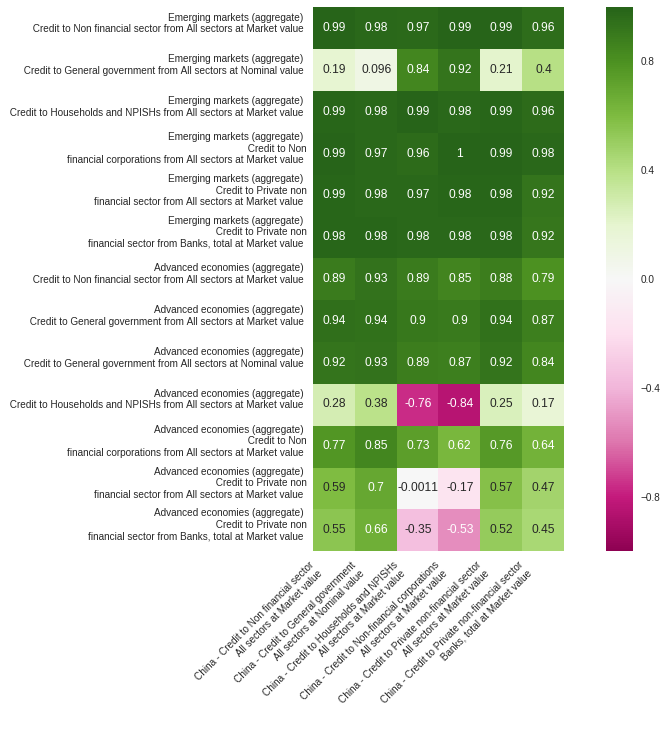

In [27]:


fig, ax =plt.subplots(figsize = (15,10))
hm = sns.heatmap(all_econs, mask=np.zeros_like(all_econs, dtype=np.bool), cmap="PiYG",  #heatmapping all_econs
           annot = True, square=True, ax=ax)    #annot = True means the heatmap will also show the correlations within the heatmap squares

xticklabels = []      #List for appending and formatting the X-ticks

#here we clean our x labels
#we split them and get rid of redundant parts using a for loop
for item in hm.get_xticklabels():     #
    part_1 = item.get_text().split('from')[0]
    part_2 = item.get_text().split('from')[1].split('-')[0]
    item.set_text(part_1 + '\n' + part_2 + '\n')
    xticklabels += [item]
    
yticklabels = []
#we clean our y labels
for item in hm.get_yticklabels():
    part_1 = item.get_text().split('-')[0]
    part_2 = item.get_text().split('-')[1]
    part_3 = item.get_text().split('-')[2]
    if 'Percentage of GDP' in part_3:
      item.set_text(part_1 + '\n' + part_2 + '\n')
    else:
      item.set_text(part_1 + '\n' + part_2 + '\n' + part_3 + '\n')
    yticklabels += [item]
    
hm.set_xticklabels(xticklabels)
hm.set_yticklabels(yticklabels)
       
#give labels a 45 degree inclination and shift them to make them more readable
plt.xticks(rotation=45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')

plt.show()

Above we are able to see that the most of the heatmap is colored green, which signifies that the data is positively correlated with corresponding Chinese credit data. It is also evident however that some of the credit data of advanced economies are not positively corrrelated with Chinese credit data. As a matter of fact, some are negatively correlated. We that this correlation matrix implies to us that the trend of credit & debt of China is more similar to that of an emerging market than that of an advanced market. This can be somewhat seen in the earlier plotly graph, where China and emerging markets show a similar slope. 

###  China vs. the World: Mapping and Geopandas

Now, we'd like to further illustrate China's standing relative to the rest of the world. For this, we'll need to use a Geopandas map file. We pulled this world map file from [geopandas.org](http://geopandas.org/mapping.html). We aim to look at a map of the world in both 2007 and 2017 to visualize how global debt ratios have changed.  Here, we'll begin the process of reading in the mapfile and merging relevant information into the worldmap file.

##### Reading in the World Map

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))    #geopandas' preset dataframe for plotting world map

In [95]:
display(world.head(5))    #GeoDataframe that contains geometry information for every coutries in the world.
         # what we need to do is to merge the data we want to plot with this GeoDataframe. 

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


##### Beginning the Merging Process

To begin merging, we'll create several functions. the first is the bis() function, which allows us to create select on the year and create a separate yearly dataframes for easier merging.

In [96]:
def bis(year):                                                                  # A function that grab certain year of data from the original BIS dataset
  data = pd.DataFrame(bisdata.loc[datetime.strptime(year +'-09-30', '%Y-%m-%d').date()])
  data.reset_index(inplace = True) 
  foo = lambda data: pd.Series([i for i in (data.split('-', maxsplit = 1))])    # Seperate original index into country/market column and debt_type column
  rev = data['index'].apply(foo)                                                # replace the 'index' column by two seperated columns and use 'rev' to contain this new dataframe
  rslt = pd.concat([rev,(data[data.columns[1]])], axis=1)                       # Merge 'rev' with the number column from the original data to create dataframe we want
  rslt.columns = ["name", "debt_type", "total"]                                 # Reset column names
  return rslt                                                                   

#Pick 2007-09-30 and 2017-09-30 data
bis2007 = bis('2007')
bis2017 = bis('2017')
bis2007.tail(5)

,name,debt_type,total
1125,South Africa,Credit to Private non-financial sector from A...,1735.33
1126,South Africa,Credit to Private non-financial sector from B...,72
1127,South Africa,Credit to Private non-financial sector from B...,213.338
1128,South Africa,Credit to Private non-financial sector from B...,1467.92
1129,South Africa,Credit to Private non-financial sector from B...,1669.68


We do this value counts to see what we're working with in this modified dataset. Right off the bat, a few things are noticeable. Firstly, though there are over 180 countries in the BIS data set, only a max of 48 reported 2017Q3 debt types. For certain debt indicators, less than 10 countries reported information. Luckily, the specific debt indicators that we would like to pull (percentage of GDP) have at least 40 countries reporting, which will still provide a strong visual understanding of China's debt ratios relative to those around the world. 

In [0]:
def sep(data):             # Function that seperate different debt types' data
  priv = data[(data['debt_type']==
             " Credit to Private non-financial sector from All sectors at Market value - Percentage of GDP - Adjusted for breaks")]
  priv["name"] = priv["name"].str.strip()
  priv.rename(columns = {'total': 'Credit to Private non-financial sector'}, inplace = True) # Find Private non-financial debt type, cut the name shorter, then rename the column

  pcGDP = data[(data['debt_type'] == 
                ' Credit to General government from All sectors at Market value - Percentage of GDP - Adjusted for breaks')]
  pcGDP["name"] = pcGDP["name"].str.strip()
  pcGDP.rename(columns = {'total': 'Credit to General government'}, inplace = True)  # Find General government debt for all sector, do the same thing as the last one

  CorDe = data[(data['debt_type'] == 
                ' Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks')]
  CorDe["name"] = CorDe["name"].str.strip()
  CorDe.rename(columns = {'total': 'Credit to Non-financial corporations'}, inplace = True) # Do the same thing for Non-Financial Corporations debt
  
  return priv, pcGDP, CorDe


In [0]:
def create_world(data):       # Create world map GeoDataframe based on data we have

  priv, pcGDP, CorDe = sep(data)   # Seperate data as three types
  dfs = [priv, pcGDP, CorDe]
  rslt = world
  for item in dfs: 
    rslt= pd.DataFrame.merge(rslt,item,on='name', how="outer")   # Merge three debt_type data into original World GeoDataframe
  rslt.drop(columns = ['debt_type_x', 'debt_type_y', 'debt_type'])   # Drop redundant columns generated from merging
  return rslt

world_2007 = create_world(bis2007)    # Create world dataframe for 2007
world_2017 = create_world(bis2017)    # Create world dataframe for 2017


Now let's take a look at 3 key debt-to-GDP Ratios from this timeframe (2017 Q3) These three maps will illustrate (via color shades) the severity or magnitude of each country's relevant debt-to-GDP ratio. The darker the colors, the higher the ratio.

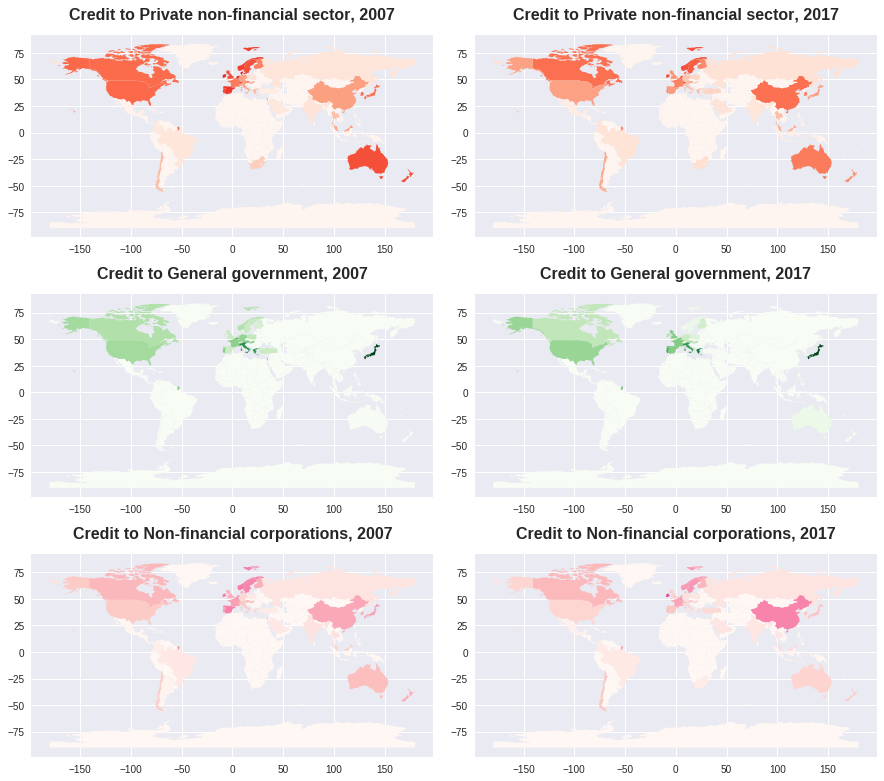

In [92]:
title = ['Credit to Private non-financial sector','Credit to General government','Credit to Non-financial corporations'] # Type of debt we want to compare
color = ['Reds', 'Greens', 'RdPu']   # Color we want to use for our map
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(12.5,11))   # Create pyplot grid for six graphs in 2*3 format

world_2007.plot(ax = ax1, column = title[0], cmap = color[0])  # Plot first type of debt we want to analyse in ax1, using color1 in the 'color' list
ax1.set_title(title[0]+', 2007', fontsize = 16, y = 1.05, fontweight = "bold") # Set the subplot title

world_2017.plot(ax = ax2, column = title[0], cmap = color[0])
ax2.set_title(title[0]+', 2017', fontsize = 16, y = 1.05, fontweight = "bold")

world_2007.plot(ax = ax3, column = title[1], cmap = color[1])
ax3.set_title(title[1]+', 2007', fontsize = 16, y = 1.05, fontweight = "bold")

world_2017.plot(ax = ax4, column = title[1], cmap = color[1])
ax4.set_title(title[1]+', 2017', fontsize = 16, y = 1.05, fontweight = "bold")

world_2007.plot(ax = ax5, column = title[2], cmap = color[2])
ax5.set_title(title[2]+', 2007', fontsize = 16, y = 1.05, fontweight = "bold")

world_2017.plot(ax = ax6, column = title[2], cmap = color[2])
ax6.set_title(title[2]+', 2017', fontsize = 16, y = 1.05, fontweight = "bold")

plt.tight_layout()  # Polishing, prevent axis names from overlapping each other


From these maps, it's clear that by Q3 of 2017, China's non-financial corporate and private sector debt is higher than the global average, but not necessarily unprecedented.There seem to be countries with at least similar non-financial private sector and non-financial corporate debt-to-GDP ratios. Notably, Canada, and the several Scandinavian countries each appear with similar colors to China. Perhaps this is a structural result of these countries economies, and these ratios have always been this high. Let's look before the financial crisis, at a map of these indicators in 2005.  

Interestingly, countries in Europe and North America seem to have decreased their credit to non-financial private sector and credit to non-financial corporations, while China increased thier credit to non-financial private sector and credit to non-financial corporations and seem to have no notable change in their credit to the central government.

### China Vs. The World: Scatterplot



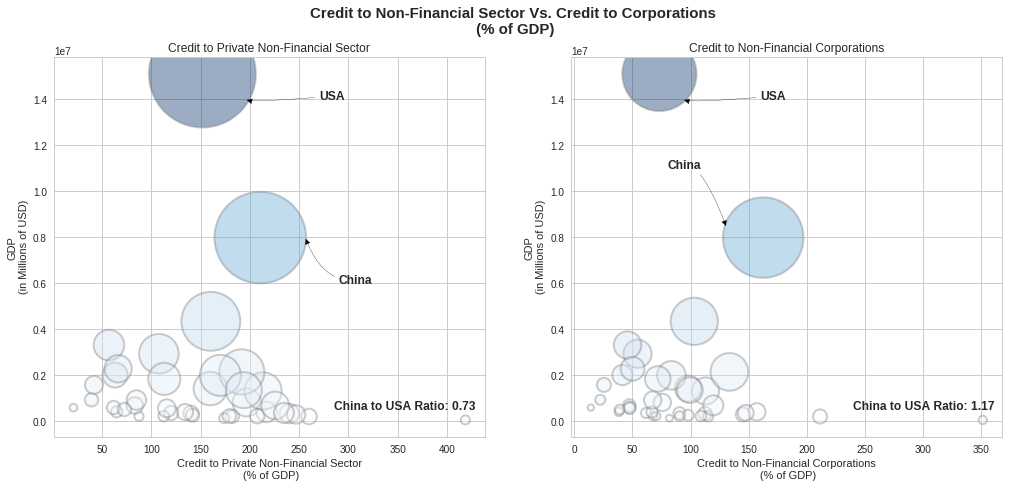

In [67]:
#Here we implement our scatterplot

fig, (ax1, ax2) = plt.subplots(1, 2, sharex ="col", figsize = (17, 7))
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.suptitle("Credit to Non-Financial Sector Vs. Credit to Corporations\n (% of GDP)", fontsize = 15, fontweight = "bold")

wcg = np.float64(world1["Credit to General government"])
wf = np.float64(world1["Credit to Private non-financial sector"])
wnc = np.float64(world1["Credit to Non-financial corporations"])
wg = np.float64(world1["gdp_md_est"])

#We want the size of each bubble to represent the size of each country's
#gdp * debt
ax1.scatter(wf, wg, s=(wf * wg)/200000, c=wg, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
# Add titles (main and on axis)
ax1.set_title("Credit to Private Non-Financial Sector")
ax1.set_xlabel('Credit to Private Non-Financial Sector\n (% of GDP)')
ax1.set_ylabel('GDP\n (in Millions of USD)')

ax2.scatter(wnc, wg, s=(wnc * wg)/200000, c=wg, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
ax2.set_title("Credit to Non-Financial Corporations")
ax2.set_xlabel('Credit to Non-Financial Corporations\n (% of GDP)')
ax2.set_ylabel('GDP\n (in Millions of USD)')

#below, we annotate the USA and China bubbles for both graphs

ax1.annotate(
    "USA", 
    xy=(195, 14000000), 
    xycoords="data", 
    xytext=(270, 14000000), 
    horizontalalignment="left", # The Text Alignment
    arrowprops={
        "arrowstyle": "-|>", # Style of arrow (we liked the ones you had in class)
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)

ax1.annotate(
    "China", 
    xy=(256, 8000000), 
    xycoords="data", 
    xytext=(290, 6000000), 
    horizontalalignment="left", 
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)
ax2.annotate(
    "USA", 
    xy=(93, 14000000), 
    xycoords="data",
    xytext=(160, 14000000), 
    horizontalalignment="left", 
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)

ax2.annotate(
    "China", 
    xy=(131, 8400000), 
    xycoords="data", 
    xytext=(80, 11000000), 
    horizontalalignment="left", 
    arrowprops={
        "arrowstyle": "-|>", 
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)

#here we display the China to USA ratio for both graphs
message = "China to USA Ratio: "
ax1.annotate(message +
    str(np.around((world1.loc[30]["gdp_md_est"]*
    world1.loc[30]["Credit to Private non-financial sector"])/
    (world1.loc[168]["gdp_md_est"]*
    world1.loc[168]["Credit to Private non-financial sector"]), decimals=2)), 
    xy=(270, 500000), # This is where we point at...
    #xycoords="data", # Not exactly sure about this
    xytext=(285, 500000), # This is about where the text is
    horizontalalignment="left", # How the text is alined

    fontsize=12, fontweight = "bold"
)

message1 = "China to USA Ratio: "

ax2.annotate(message1 +
    str(np.around((world1.loc[30]["gdp_md_est"]*
    world1.loc[30]["Credit to Non-financial corporations"])/
    (world1.loc[168]["gdp_md_est"]*
    world1.loc[168]["Credit to Non-financial corporations"]), decimals=2)), 
    xy=(250, 500000),
    #xycoords="data", 
    xytext=(240, 500000), 
    horizontalalignment="left", 
    fontweight = "bold"
            )

plt.show()

#### China Vs. The World: Scatterplot Takeaways

In the maps plotted earlier, we have seen that credit to non-financial private sector and credit to non-financial corporations for China has increased more compared to other countries, so we decided to take a closer look.  

The scatterplot displays the relationship between GDP and Credit for each country in the BIS dataset. China and the United States represent the highest level of GDP X Credit as % of GDP.  In this first plot, we can see that the ratio between China and the US is approximatedly 0.73, meaning that the GDP X Credit as % of GDP to Private Non-Financial Sector level of the US is considerably bigger. However, if we look at the second plot, we can see thatthe China to US  GDP X Credit  as % of GDP to Non-Financial Corporations ratio is 1.17, meaning that China exceeds the US by 17%. Taking in count that the US GDP is greater than China, the fact that China still exceeds in the GDP X Credit to Non-Financial Corporations as % of GDP tells us how big its credit to corporations is compared to the US. By looking at the x-axis of the graphs themselves, it can also be seen that the % of Credit to Corporations as GDP of China is nearly twice the US.

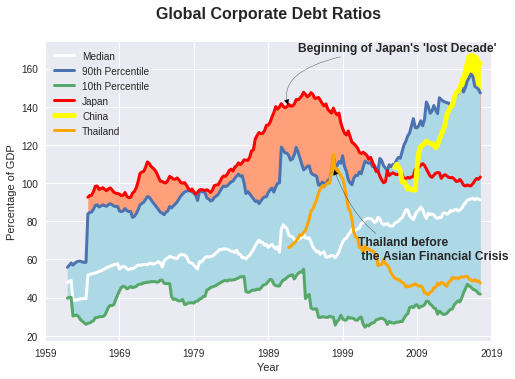

In [109]:
#we try to display the corporate debt of different countries that showed
#similar increases in corporate debt as China.
#We also add in the median, 10th, and 90th percentile values of 
#corporate debt across time

sns.set_style("darkgrid")
corpdebt = bisdata.filter(like = "Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP", axis = 1)
corpdebt = corpdebt.astype(float) #We need this to make sure that the values of corpdebt can be graphed

med = corpdebt.median(axis=1) # This will compute the median, across countries, within a year
q90 = corpdebt.quantile(0.90, axis=1) # This is going to compute the 90th percentile
q10 = corpdebt.quantile(0.10, axis=1) # This is going to compute teh 10th percentile


fig, ax  = plt.subplots()

med.plot(ax = ax, color ="white", lw = 3, label = 'Median')

q90.plot(ax = ax, lw = 3, label= '90th Percentile')

q10.plot(ax = ax, lw = 3, label = '10th Percentile')

#we choose Japan and Thailand as comparable countries to China

corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "red", lw = 3, label = 'Japan', )

corpdebt["""China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "yellow", lw = 5, label = "China")

corpdebt["""Thailand - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""].plot(
    ax = ax, color = "orange", lw = 3, label = "Thailand")

#we fill the spaces between the line grpahs to highlight the difference
#between countries

ax.fill_between(med.index, q10, q90, color = "#ADD8E6")

ax.fill_between(med.index, q90, 
                corpdebt["Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"],
                color = "#FFA07A" )

ax.fill_between(med.index,corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""],
                q90,
where=corpdebt["""Japan - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""] <= q90, 
                color = "#ADD8E6")

ax.fill_between(med.index,corpdebt["China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"], 
q90, where=corpdebt["""China - Credit to Non-financial corporations from All sectors at Market value - Percentage of GDP - Adjusted for breaks"""] >= q90,
                color = "yellow")


ax.set_title("Global Corporate Debt Ratios\n", fontweight = "bold", fontsize = 16) 
ax.set_ylabel("Percentage of GDP")
ax.set_xlabel("Year")
plt.xlim(('1959-01-01', '2019-01-01'))
japyear = .5

#We annotate notes for Thailand and Japan

ax.annotate(
    "Beginning of Japan's 'lost Decade'", 
    xy=("1991-12-31", 140), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=("1993-03-31", 169), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)
ax.annotate(
    "Thailand before \n the Asian Financial Crisis", 
    xy=("1997-12-31", 108), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=("2001-03-31", 60), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        "connectionstyle": "angle3,angleA=5,angleB=110",
        "color": "black"
    },
    fontsize=12, fontweight = "bold"
)


plt.legend()
plt.show()


The graph above depicts the amount corporate debt from China in comparison to the rest of the world. 
This graph helps contextualize China's rising corporate debt historically (with two Asian countries who experienced debt crises--Japan and Thailand--for reference) and also provides a look at global corporate leverage. Several interesting trends appear. Firstly, it's clear that over time, the median country's corporations have become more leveraged--median corporate debt-to-GDP ratios have increased from ~60% to over 85% by 2016. This seems to be driven largely by the top-end growth of the 90th percentile.  
This graph also makes it evident that Chinese corporate debt has rapidly increased since its first recorded corporate debt level. Towards the end, it surpasses the 90th percentile of the world, becoming one of the countries with the highest corporate debt. We depict Japan and Thailand as well, as they have shown similar rapid growths in the past as well. Both countries reached or surpassed the 90th percentile level, but subsequently experienced a crisis, leading corporate debt levels to drastically decrease. Japan's corporate data fell below the 90th percentile level for the first time since its data was recorded, and Thailaland's nearly reached the bottom 10% . An advanced economy like Japan and an emerging economy like Thailand were both unable to sustain high levels of growth in corporate debt for long.

## Conclusions
### Chinese Bond Data
#### Spider Graphs
All bonds grew significantly since 2001, it initially seemed unclear as to whether corporate debt was specifically growing much faster.
#### Time Series Graph


### BIS Dataset

#### Comparisons to Advanced Economies and Emerging Markets
Very similar growth slope to that of emerging markets, but China's corporate debt to GDP far outstrips that of either advanced economies or emerging markets.

##### Correlation Heatmaps

Strong correlation with most debt indicators in emerging markets

#### World Maps
Comparisons between credit to Private non-financial sectors, credit to Non-financial corporations, and credit to General Government between 2007 and 2017.
Takeaways 

#### Credit to non-financial sector Vs. Credit to non-financial corporations

China's credit to private non-financial sector is high, but lower than the United States in absolute terms. China's credit to the Non-financial corporate sector is, in absolute terms, actually higher than in the United States. This indicates that China has a significantly high level of corporate debt--the highest in the world, in fact--and that this credit boom is driven primarily because of corporate debt, and not household/individual debt.

#### China Trend Vs. the World

In comparisons

Japan was an advanced economy, while Thailand was an emerging market. both experienced rapid growth in corporate debt followed by practical economic crises. The aim of this graph was to determine how serious China's corporate debt issue is relative to these two historical benchmarks. The results paint a bleak picture for China's economic outlook. Points that would indicate that China is *Not* necessarily headed towards a crisis, however, are as follows: Japan's peak corporate debt to GDP ratio may have been lower than China's is currently, but Japan was--at the time--much more of a global outlier than China is today. Thus, in the context of contemporary